In [275]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [276]:
dataframe = pd.read_csv("Adsorption_Data.csv")

In [277]:
dataframe.head()

,C(x1),H(x2),N(x3),Si(x4),BET(x5),Adorption Capacity(output)
0,12.8,1.16,0.38,7.51,8.75,0.144
1,6.5,0.57,0.04,3.34,3.69,0.334
2,8.7,0.54,0.21,40.98,33.37,0.452
3,3.5,0.35,0.12,22.05,7.55,0.333
4,7.2,0.71,0.03,3.16,1.97,0.383


In [278]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
C(x1),35.0,58.794286,31.840992,2.50,41.300,69.10,86.200,92.60
H(x2),35.0,1.704286,0.950239,0.15,1.180,1.70,2.100,4.10
N(x3),35.0,0.591714,0.549762,0.00,0.235,0.35,0.895,2.10
Si(x4),35.0,8.392000,12.089095,0.38,3.130,4.52,8.155,58.88
BET(x5),35.0,187.250286,241.811243,1.97,14.675,96.00,332.500,1085.00
Adorption Capacity(output),35.0,3.115200,6.441286,0.06,0.444,1.20,2.600,34.20


In [279]:
dataframe.shape

(35, 6)

In [280]:
dataframe.corr()

,C(x1),H(x2),N(x3),Si(x4),BET(x5),Adorption Capacity(output)
C(x1),1.000000,0.661529,0.132219,-0.580041,0.440584,0.270624
H(x2),0.661529,1.000000,0.014156,-0.380672,0.163708,0.001367
N(x3),0.132219,0.014156,1.000000,-0.157786,-0.316263,-0.186562
Si(x4),-0.580041,-0.380672,-0.157786,1.000000,-0.179075,-0.092483
BET(x5),0.440584,0.163708,-0.316263,-0.179075,1.000000,0.787414
Adorption Capacity(output),0.270624,0.001367,-0.186562,-0.092483,0.787414,1.000000


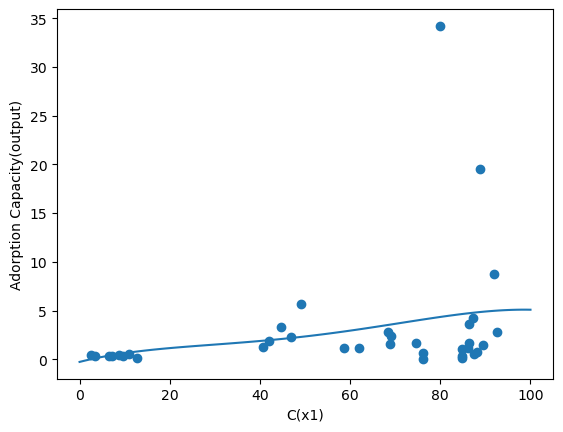

In [281]:
mymodel = np.poly1d(np.polyfit(dataframe['C(x1)'], dataframe['Adorption Capacity(output)'], 4))

myline = np.linspace(0, 100, 100)
plt.scatter(dataframe['C(x1)'],dataframe['Adorption Capacity(output)'])
plt.plot(myline,mymodel(myline))
plt.xlabel('C(x1)')
plt.ylabel('Adorption Capacity(output)')
plt.show()

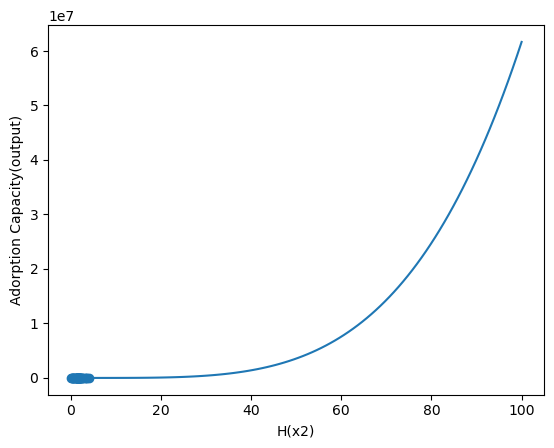

In [282]:
mymodel = np.poly1d(np.polyfit(dataframe['H(x2)'], dataframe['Adorption Capacity(output)'], 4))

myline = np.linspace(0, 100, 100)
plt.scatter(dataframe['H(x2)'],dataframe['Adorption Capacity(output)'])
plt.plot(myline,mymodel(myline))
plt.xlabel('H(x2)')
plt.ylabel('Adorption Capacity(output)')
plt.show()

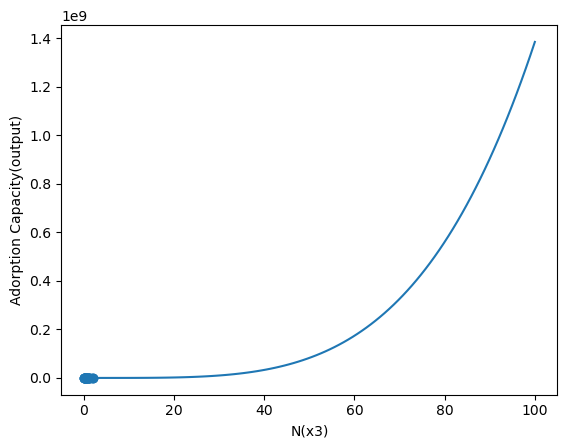

In [283]:
mymodel = np.poly1d(np.polyfit(dataframe['N(x3)'], dataframe['Adorption Capacity(output)'], 4))

myline = np.linspace(0, 100, 100)
plt.scatter(dataframe['N(x3)'],dataframe['Adorption Capacity(output)'])
plt.plot(myline,mymodel(myline))
plt.xlabel('N(x3)')
plt.ylabel('Adorption Capacity(output)')
plt.show()

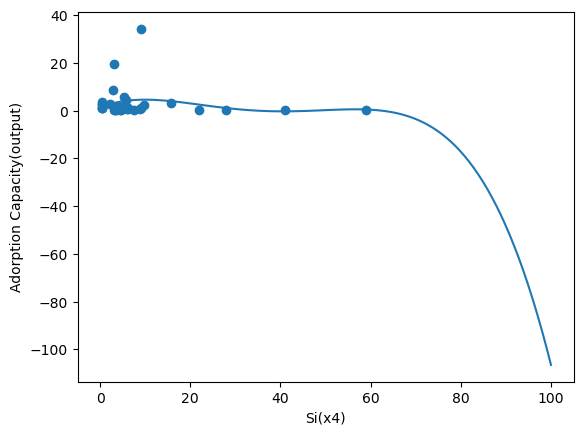

In [284]:
mymodel = np.poly1d(np.polyfit(dataframe['Si(x4)'], dataframe['Adorption Capacity(output)'], 4))

myline = np.linspace(0, 100, 100)
plt.scatter(dataframe['Si(x4)'],dataframe['Adorption Capacity(output)'])
plt.plot(myline,mymodel(myline))
plt.xlabel('Si(x4)')
plt.ylabel('Adorption Capacity(output)')
plt.show()

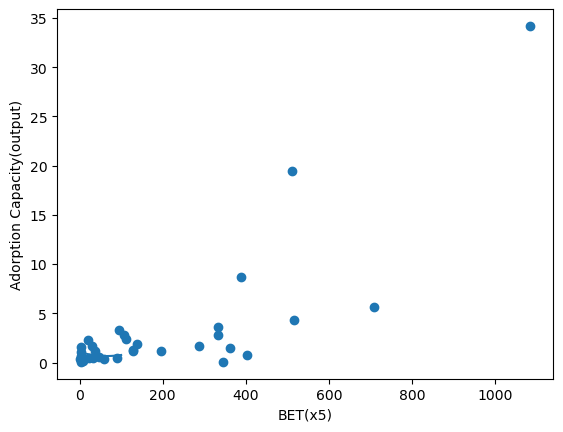

In [285]:
mymodel = np.poly1d(np.polyfit(dataframe['BET(x5)'], dataframe['Adorption Capacity(output)'], 4))

myline = np.linspace(0, 100, 100)
plt.scatter(dataframe['BET(x5)'],dataframe['Adorption Capacity(output)'])
plt.plot(myline,mymodel(myline))
plt.xlabel('BET(x5)')
plt.ylabel('Adorption Capacity(output)')
plt.show()

In [286]:
df_train, df_test = train_test_split(dataframe, test_size=0.2, random_state=10)
df_train, df_valid = train_test_split(dataframe, test_size=0.2, random_state=10)

In [287]:
X_train = df_train.iloc[:,0:5]
Y_train = df_train.iloc[:,5]

X_valid = df_valid.iloc[:,0:5]
Y_valid = df_valid.iloc[:,5]

X_test = df_test.iloc[:,0:5]
Y_test = df_test.iloc[:,5]

In [288]:
X_train.shape, X_valid.shape, X_test.shape

((28, 5), (7, 5), (7, 5))

In [289]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_valid = torch.from_numpy(X_valid.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))



In [290]:
def df_to_tensor(df):
    return torch.from_numpy(df.values).float()
Y_train = df_to_tensor(Y_train)
Y_valid = df_to_tensor(Y_valid)
Y_test = df_to_tensor(Y_test)

In [291]:
Y_train.shape

torch.Size([28])

In [292]:
n_features = X_train.shape[1]
input_size = X_train.shape[1]
hidden_size = 64
n_output = 1

# MODEL-1

In [198]:
class NeuralNet1(nn.Module):
    def __init__(self, n_features, n_output):
        super(NeuralNet1, self).__init__()
        self.l1 = nn.Linear(n_features,81) 
        self.l2 = nn.Linear(81,27)
        self.l3 = nn.Linear(27,9)
        self.l4 = nn.Linear(9,n_output)
    
    def forward(self, x):
        out = self.l1(x)
        out = torch.tanh(out)
        out = self.l2(out)
        out = F.leaky_relu(out)
        out = self.l3(out)
        out = F.leaky_relu(out)
        out = self.l4(out)
        return out

model = NeuralNet1(input_size,n_output )
print(model)
num_epochs = 100
learning_rate = 0.001
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
    # Forward pass and loss
    Y_pred = model(X_train)
    loss = criterion(Y_pred, Y_train)
   
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()
        
    if epoch % 10 == 0:
        val_outputs = model(X_valid)
        val_loss = criterion(val_outputs, Y_valid)
        print("Epoch: {}, Validation Loss: {}".format(epoch, val_loss.item()))

print("-----------------------------------------------------------------------------------------------------------------------")

NeuralNet1(
  (l1): Linear(in_features=5, out_features=81, bias=True)
  (l2): Linear(in_features=81, out_features=27, bias=True)
  (l3): Linear(in_features=27, out_features=9, bias=True)
  (l4): Linear(in_features=9, out_features=1, bias=True)
)
Epoch: 0, Validation Loss: 2.2726354598999023
Epoch: 10, Validation Loss: 2.0923140048980713
Epoch: 20, Validation Loss: 1.933562159538269
Epoch: 30, Validation Loss: 1.792373538017273
Epoch: 40, Validation Loss: 1.6668330430984497
Epoch: 50, Validation Loss: 1.5557440519332886
Epoch: 60, Validation Loss: 1.4584499597549438
Epoch: 70, Validation Loss: 1.3735098838806152
Epoch: 80, Validation Loss: 1.3002023696899414
Epoch: 90, Validation Loss: 1.2374894618988037
-----------------------------------------------------------------------------------------------------------------------


C:\Users\Sneh Omer\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\Sneh Omer\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


# MODEL-2

In [294]:
class NeuralNet2(nn.Module):
    def __init__(self, n_features, n_output):
        super(NeuralNet2, self).__init__()
        self.l1 = nn.Linear(n_features,9) 
        self.l2 = nn.Linear(9,6)
        self.l3 = nn.Linear(6,n_output)
    
    def forward(self, x):
        out = self.l1(x)
        out = torch.tanh(out)
        out = self.l2(out)
        out = F.leaky_relu(out)
        out = self.l3(out)
        return out

model = NeuralNet2(input_size,n_output )
print(model)
num_epochs = 100
learning_rate = 0.001
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
    # Forward pass and loss
    Y_pred = model(X_train)
    loss = criterion(Y_pred, Y_train)
   
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()
        
    if epoch % 10 == 0:
        val_outputs = model(X_valid)
        val_loss = criterion(val_outputs, Y_valid)
        print("Epoch: {}, Validation Loss: {}".format(epoch, val_loss.item()))

print("-----------------------------------------------------------------------------------------------------------------------")

NeuralNet2(
  (l1): Linear(in_features=5, out_features=9, bias=True)
  (l2): Linear(in_features=9, out_features=6, bias=True)
  (l3): Linear(in_features=6, out_features=1, bias=True)
)
Epoch: 0, Validation Loss: 2.099424123764038
Epoch: 10, Validation Loss: 1.908515453338623
Epoch: 20, Validation Loss: 1.7408838272094727
Epoch: 30, Validation Loss: 1.5934678316116333
Epoch: 40, Validation Loss: 1.4652416706085205
Epoch: 50, Validation Loss: 1.3559350967407227
Epoch: 60, Validation Loss: 1.2641829252243042
Epoch: 70, Validation Loss: 1.1891913414001465
Epoch: 80, Validation Loss: 1.1312658786773682
Epoch: 90, Validation Loss: 1.090569257736206
-----------------------------------------------------------------------------------------------------------------------


# MODEL-3

In [217]:
class NeuralNet3(nn.Module):
    def __init__(self, n_features, n_output):
        super(NeuralNet3, self).__init__()
        self.l1 = nn.Linear(n_features,15)
        self.l2 = nn.Linear(15,9)
        self.l3 = nn.Linear(9,3)
        self.l4 = nn.Linear(3, n_output)
    
    def forward(self, x):
        out = self.l1(x)
        out = F.leaky_relu(out)
        out = self.l2(out)
        out = F.leaky_relu(out)
        out = self.l3(out)
        out = torch.tanh(out)
        out = self.l4(out)
        return out

model = NeuralNet3(input_size,n_output )
print(model)
num_epochs = 100
learning_rate = 0.0001
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
    # Forward pass and loss
    Y_pred = model(X_train)
    loss = criterion(Y_pred, Y_train)
   
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()
        
    if epoch % 10 == 0:
        val_outputs = model(X_valid)
        val_loss = criterion(val_outputs, Y_valid)
        print("Epoch: {}, Validation Loss: {}".format(epoch, val_loss.item()))

print("-----------------------------------------------------------------------------------------------------------------------")

NeuralNet3(
  (l1): Linear(in_features=5, out_features=15, bias=True)
  (l2): Linear(in_features=15, out_features=9, bias=True)
  (l3): Linear(in_features=9, out_features=3, bias=True)
  (l4): Linear(in_features=3, out_features=1, bias=True)
)
Epoch: 0, Validation Loss: 2.360309600830078
Epoch: 10, Validation Loss: 2.3353757858276367
Epoch: 20, Validation Loss: 2.310741901397705
Epoch: 30, Validation Loss: 2.2864041328430176
Epoch: 40, Validation Loss: 2.2623589038848877
Epoch: 50, Validation Loss: 2.2386014461517334
Epoch: 60, Validation Loss: 2.215129852294922
Epoch: 70, Validation Loss: 2.191932201385498
Epoch: 80, Validation Loss: 2.1690118312835693
Epoch: 90, Validation Loss: 2.146367073059082
-----------------------------------------------------------------------------------------------------------------------


C:\Users\Sneh Omer\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\Sneh Omer\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


# ********************************************************************************************


Developed 3 different models, by varying the number of hidden layer, number of neurons and activation functions used.

Loss on Valid DataSet for :
    
    Model1: 1.2374894618988037
    
    Model2: 1.090569257736206
    
    Model3: 2.146367073059082

So, we will analyse Model2 and will tune its other hyperparameters to get a better result.

# ********************************************************************************************

# Modifying Model-2
{Changing the number of epochs and learning rate}

In [255]:
class NeuralNet2(nn.Module):
    def __init__(self, n_features, n_output):
        super(NeuralNet2, self).__init__()
        self.l1 = nn.Linear(n_features,9) 
        self.l2 = nn.Linear(9,6)
        self.l3 = nn.Linear(6,n_output)
    
    def forward(self, x):
        out = self.l1(x)
        out = torch.tanh(out)
        out = self.l2(out)
        out = F.leaky_relu(out)
        out = self.l3(out)
        return out

model = NeuralNet2(input_size,n_output )
print(model)
num_epochs = 50
learning_rate = 0.0001
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
    # Forward pass and loss
    Y_pred = model(X_train)
    loss = criterion(Y_pred, Y_train)
   
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()
        
    if epoch % 10 == 0:
        val_outputs = model(X_valid)
        val_loss = criterion(val_outputs, Y_valid)
        print("Epoch: {}, Validation Loss: {}".format(epoch, val_loss.item()))

print("-----------------------------------------------------------------------------------------------------------------------")

NeuralNet2(
  (l1): Linear(in_features=5, out_features=9, bias=True)
  (l2): Linear(in_features=9, out_features=6, bias=True)
  (l3): Linear(in_features=6, out_features=1, bias=True)
)
Epoch: 0, Validation Loss: 1.885654330253601
Epoch: 10, Validation Loss: 1.8665893077850342
Epoch: 20, Validation Loss: 1.8478749990463257
Epoch: 30, Validation Loss: 1.8295048475265503
Epoch: 40, Validation Loss: 1.811471939086914
-----------------------------------------------------------------------------------------------------------------------


C:\Users\Sneh Omer\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\Sneh Omer\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [133]:
class NeuralNet2(nn.Module):
    def __init__(self, n_features, n_output):
        super(NeuralNet2, self).__init__()
        self.l1 = nn.Linear(n_features,9) 
        self.l2 = nn.Linear(9,6)
        self.l3 = nn.Linear(6,n_output)
    
    def forward(self, x):
        out = self.l1(x)
        out = torch.tanh(out)
        out = self.l2(out)
        out = F.leaky_relu(out)
        out = self.l3(out)
        return out

model = NeuralNet2(input_size,n_output )
print(model)
num_epochs = 400
learning_rate = 0.002
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
    # Forward pass and loss
    Y_pred = model(X_train)
    loss = criterion(Y_pred, Y_train)
   
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()
        
    if epoch % 10 == 0:
        val_outputs = model(X_valid)
        val_loss = criterion(val_outputs, Y_valid)
        print("Epoch: {}, Validation Loss: {}".format(epoch, val_loss.item()))

print("-----------------------------------------------------------------------------------------------------------------------")

NeuralNet3(
  (l1): Linear(in_features=5, out_features=15, bias=True)
  (l2): Linear(in_features=15, out_features=9, bias=True)
  (l3): Linear(in_features=9, out_features=3, bias=True)
  (l4): Linear(in_features=3, out_features=1, bias=True)
)
Epoch: 0, Loss: 58.37073516845703, Validation Loss: 1.2643725872039795
Epoch: 10, Loss: 58.246456146240234, Validation Loss: 1.2448363304138184
Epoch: 20, Loss: 58.12374496459961, Validation Loss: 1.226418137550354
Epoch: 30, Loss: 58.0025749206543, Validation Loss: 1.2090888023376465
Epoch: 40, Loss: 57.88288879394531, Validation Loss: 1.1928207874298096
Epoch: 50, Loss: 57.76463317871094, Validation Loss: 1.1775885820388794
Epoch: 60, Loss: 57.64775466918945, Validation Loss: 1.163407564163208
Epoch: 70, Loss: 57.5322380065918, Validation Loss: 1.1502262353897095
Epoch: 80, Loss: 57.41804885864258, Validation Loss: 1.1380037069320679
Epoch: 90, Loss: 57.305145263671875, Validation Loss: 1.1267836093902588
Epoch: 100, Loss: 57.193504333496094, V

C:\Users\Sneh Omer\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\Sneh Omer\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 170, Loss: 56.445472717285156, Validation Loss: 1.068496584892273
Epoch: 180, Loss: 56.3430290222168, Validation Loss: 1.0649287700653076
Epoch: 190, Loss: 56.241615295410156, Validation Loss: 1.0621442794799805
Epoch: 200, Loss: 56.14118957519531, Validation Loss: 1.0601303577423096
Epoch: 210, Loss: 56.041744232177734, Validation Loss: 1.0588809251785278
Epoch: 220, Loss: 55.943267822265625, Validation Loss: 1.0583860874176025
Epoch: 230, Loss: 55.845794677734375, Validation Loss: 1.0586363077163696
Epoch: 240, Loss: 55.749298095703125, Validation Loss: 1.059624433517456
Epoch: 250, Loss: 55.65374755859375, Validation Loss: 1.061343789100647
Epoch: 260, Loss: 55.55913543701172, Validation Loss: 1.0637880563735962
Epoch: 270, Loss: 55.46544647216797, Validation Loss: 1.0669511556625366
Epoch: 280, Loss: 55.37267303466797, Validation Loss: 1.0708271265029907
Epoch: 290, Loss: 55.28079605102539, Validation Loss: 1.0754104852676392
Epoch: 300, Loss: 55.189815521240234, Validation 

# Observing the errors of different validation loss values, the earlier designed Model-2, gives the lowest loss-value. Thus, we will proceed with Model-2.

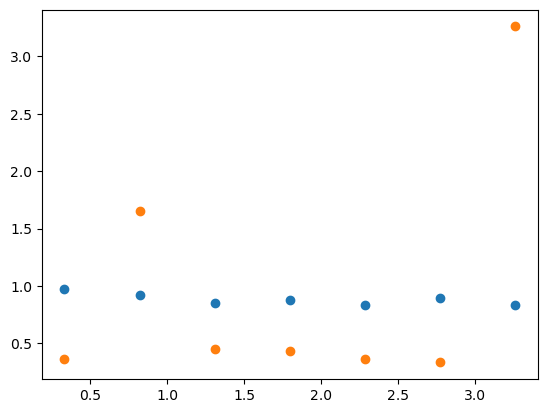

In [295]:
Y_pred = model(X_test)
X = Y_pred.detach().numpy()
Y = Y_test.detach().numpy()
Z = np.linspace(min(min(X),min(Y)),max(max(X),max(Y)),X.shape[0])
plt.scatter(Z,X)
plt.scatter(Z,Y)
plt.show()

# ********************************************************************************************